<a href="https://colab.research.google.com/github/TejaswiniDevineni/Email-Campaign-Optimization/blob/main/Email_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study - E-mail Campaign Optimization

## Notebook Contents
1. Data General Overview
2. Data Wrangling & Cleaning
3. Exploratory Analysis - Campaign Evaluation
4. Predictive Analysis - Machine Learning Model
5. Final Report & Findings

### 1. Data General Overview

In [ ]:
# Import Needed Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
# Import other libraries 
import os, warnings, time, pickle

In [ ]:
# Load data and start overview
df = pd.read_excel('data.xlsx')
df.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0


In [ ]:
# more overview of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recency          64000 non-null  int64  
 1   history_segment  64000 non-null  object 
 2   history          64000 non-null  float64
 3   mens             64000 non-null  int64  
 4   womens           64000 non-null  int64  
 5   zip_code         64000 non-null  object 
 6   newbie           64000 non-null  int64  
 7   channel          64000 non-null  object 
 8   segment          64000 non-null  object 
 9   visit            64000 non-null  int64  
 10  conversion       64000 non-null  int64  
 11  spend            64000 non-null  float64
dtypes: float64(2), int64(6), object(4)
memory usage: 5.9+ MB


In [ ]:
df.describe()

,recency,history,mens,womens,newbie,visit,conversion,spend
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,5.763734,242.085656,0.551031,0.549719,0.502250,0.146781,0.009031,1.050908
std,3.507592,256.158608,0.497393,0.497526,0.499999,0.353890,0.094604,15.036448
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,64.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,158.110000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,9.000000,325.657500,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,12.000000,3345.930000,1.000000,1.000000,1.000000,1.000000,1.000000,499.000000


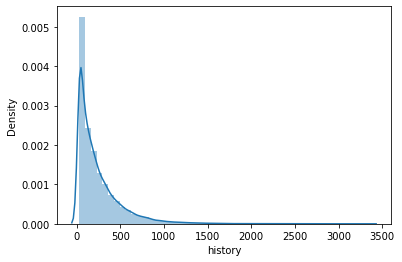

In [ ]:
# getting if there are any outliers in data 
sns.distplot(df['history']);

#### Main Findings in data that needs modification 
1. No missing values were found in data
2. No outliers, box plot isn't showing outliers. Actually data is right skewed. 
3. Need to transform object data types into string
4. men & women merchandise columns to be merged into one column

#### More transformation would be needed in Predictive model building phase 
1. convert string data types into numerical (1/0)
2. remove useless columns such as history_segment & one of one-hot encoded new columns
3. It would be very obvious to remove conversion column as it's already noted from spend value. 

### 2. Data Wrangling & Cleaning 

In [ ]:
# Convert object data types into string values
for column in df.columns : 
    if df[column].dtype == 'O':
        df[column] = df[column].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recency          64000 non-null  int64  
 1   history_segment  64000 non-null  string 
 2   history          64000 non-null  float64
 3   mens             64000 non-null  int64  
 4   womens           64000 non-null  int64  
 5   zip_code         64000 non-null  string 
 6   newbie           64000 non-null  int64  
 7   channel          64000 non-null  string 
 8   segment          64000 non-null  string 
 9   visit            64000 non-null  int64  
 10  conversion       64000 non-null  int64  
 11  spend            64000 non-null  float64
dtypes: float64(2), int64(6), string(4)
memory usage: 5.9 MB


In [ ]:
# for data used in predictive analysis - ML Model 
df_ml = df.copy()
df_ml = pd.get_dummies(df_ml, columns=['zip_code', 'channel', 'segment'], dtype='int64')
df_ml = df_ml.drop(['history_segment', 'zip_code_Surburban', 'channel_Multichannel', 'segment_No E-Mail', 'conversion'], axis=1)
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   recency                64000 non-null  int64  
 1   history                64000 non-null  float64
 2   mens                   64000 non-null  int64  
 3   womens                 64000 non-null  int64  
 4   newbie                 64000 non-null  int64  
 5   visit                  64000 non-null  int64  
 6   spend                  64000 non-null  float64
 7   zip_code_Rural         64000 non-null  int64  
 8   zip_code_Urban         64000 non-null  int64  
 9   channel_Phone          64000 non-null  int64  
 10  channel_Web            64000 non-null  int64  
 11  segment_Mens E-Mail    64000 non-null  int64  
 12  segment_Womens E-Mail  64000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 6.3 MB


In [ ]:
# rename columns in ML-dataset 
df_ml.rename(str.lower, axis='columns', inplace=True)
df_ml.columns = df_ml.columns.str.replace(' ', '_')
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   recency                64000 non-null  int64  
 1   history                64000 non-null  float64
 2   mens                   64000 non-null  int64  
 3   womens                 64000 non-null  int64  
 4   newbie                 64000 non-null  int64  
 5   visit                  64000 non-null  int64  
 6   spend                  64000 non-null  float64
 7   zip_code_rural         64000 non-null  int64  
 8   zip_code_urban         64000 non-null  int64  
 9   channel_phone          64000 non-null  int64  
 10  channel_web            64000 non-null  int64  
 11  segment_mens_e-mail    64000 non-null  int64  
 12  segment_womens_e-mail  64000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 6.3 MB


### 3. Exploratory Analysis - Campaign Evaluation

In this Section, we would work though main dataset after modification. 

Work would be to drive main insights helpful in predictive analysis and creating final analysis report. 

In [ ]:
# data overview 
df.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0


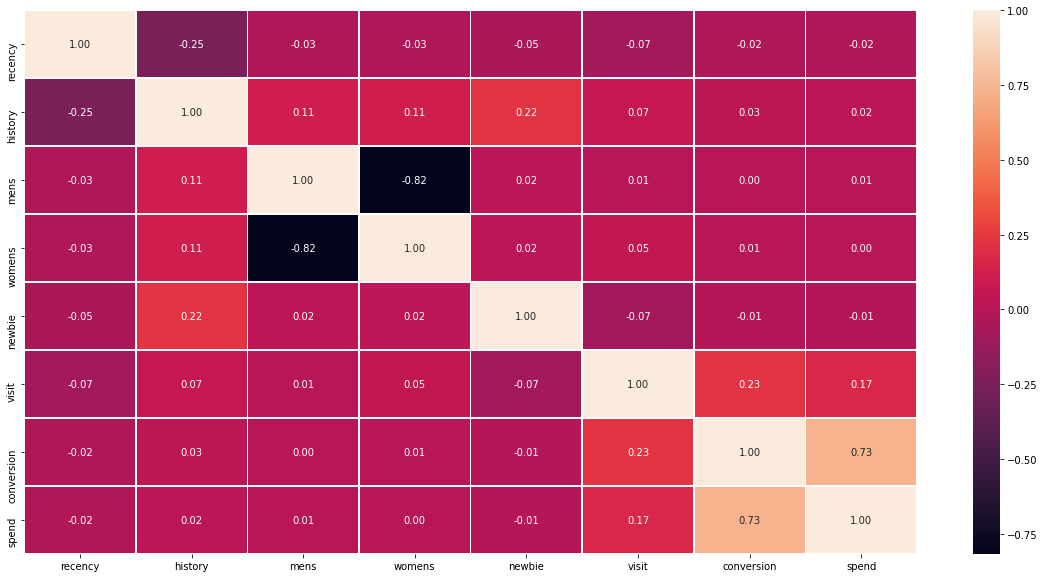

In [ ]:
# Starting with heatmap to view correlations 
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidth=0.5);

#### To study each campaign segment, I will convert dataset into 3 datasets each to be studied separately

In [ ]:
df_men = df[df['segment']=='Mens E-Mail']
df_women = df[df['segment']=='Womens E-Mail']
df_nocamp = df[df['segment']=='No E-Mail']

In [ ]:
df_men.describe()

,recency,history,mens,womens,newbie,visit,conversion,spend
count,21307.000000,21307.000000,21307.000000,21307.000000,21307.000000,21307.000000,21307.000000,21307.000000
mean,5.773642,242.835931,0.550946,0.551415,0.501525,0.182757,0.012531,1.422617
std,3.513350,260.355685,0.497409,0.497361,0.500009,0.386476,0.111241,17.754205
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,63.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,157.220000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,9.000000,325.215000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,12.000000,3215.970000,1.000000,1.000000,1.000000,1.000000,1.000000,499.000000


In [ ]:
df_women.describe()

,recency,history,mens,womens,newbie,visit,conversion,spend
count,21387.000000,21387.000000,21387.000000,21387.000000,21387.000000,21387.000000,21387.000000,21387.000000
mean,5.767850,242.536633,0.548932,0.550101,0.503250,0.151400,0.008837,1.077202
std,3.511989,255.332880,0.497612,0.497495,0.500001,0.358447,0.093592,15.116106
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,65.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,160.090000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,9.000000,326.820000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,12.000000,3040.200000,1.000000,1.000000,1.000000,1.000000,1.000000,499.000000


In [ ]:
df_nocamp.describe()

,recency,history,mens,womens,newbie,visit,conversion,spend
count,21306.000000,21306.000000,21306.000000,21306.000000,21306.000000,21306.000000,21306.000000,21306.000000
mean,5.749695,240.882653,0.553224,0.547639,0.501971,0.106167,0.005726,0.652789
std,3.497517,252.739362,0.497171,0.497737,0.500008,0.308059,0.075456,11.588200
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,65.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,156.655000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,9.000000,325.167500,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,12.000000,3345.930000,1.000000,1.000000,1.000000,1.000000,1.000000,499.000000


#### Now, I'll add note about performance for each dataset (E-mail campaign)

In [ ]:
camps = {'Men':df_men, 'Women':df_women, 'No':df_nocamp}
for item, camp in camps.items(): 
    print (f"Evaluation Statement for {item} E-mail campaign ")
    print (f"    Visits Percentage in last two weeks : {camp['visit'].mean()*100:.2f} %")
    print (f"    Conversion Percentage in last two weeks : {camp['conversion'].mean()*100:.2f} %")
    print (f"    Total Spent Dollars due to campaign in last two weeks : {camp['spend'].sum():,.2f} $")
    print ("----------------------------------------------------------------------------------------")

Evaluation Statement for Men E-mail campaign 
    Visits Percentage in last two weeks : 18.28 %
    Conversion Percentage in last two weeks : 1.25 %
    Total Spent Dollars due to campaign in last two weeks : 30,311.69 $
----------------------------------------------------------------------------------------
Evaluation Statement for Women E-mail campaign 
    Visits Percentage in last two weeks : 15.14 %
    Conversion Percentage in last two weeks : 0.88 %
    Total Spent Dollars due to campaign in last two weeks : 23,038.11 $
----------------------------------------------------------------------------------------
Evaluation Statement for No E-mail campaign 
    Visits Percentage in last two weeks : 10.62 %
    Conversion Percentage in last two weeks : 0.57 %
    Total Spent Dollars due to campaign in last two weeks : 13,908.33 $
----------------------------------------------------------------------------------------


#### From previous statement, it would be clear that Men E-mail campaign is outperforming other campaigns : 
- More than 1.3 of women campaign in spending and more than 2 times that of no campaign at all 
- nearly same results with visits rate affected with campaign

#### For more exploration, we would have to view effect of other attributes on visits, spending 
- Recency
- History Segment 
- gender merchandise 
- zip_code
- channel 

##### In here I would go with creation of gender merchandise column described in date overview section

In [ ]:
filters = [
    (df.mens==1) & (df.womens==0),
    (df.mens==0) & (df.womens==1),
    (df.mens==1) & (df.womens==1)
]
values = ['Men', 'Women', 'Both Genders']
df['gender_merchandise'] = np.select(filters, values)
df = df.drop(['mens', 'womens'], axis=1)
df.head()

,recency,history_segment,history,zip_code,newbie,channel,segment,visit,conversion,spend,gender_merchandise
0,10,2) $100 - $200,142.44,Surburban,0,Phone,Womens E-Mail,0,0,0.0,Men
1,6,3) $200 - $350,329.08,Rural,1,Web,No E-Mail,0,0,0.0,Both Genders
2,7,2) $100 - $200,180.65,Surburban,1,Web,Womens E-Mail,0,0,0.0,Women
3,9,5) $500 - $750,675.83,Rural,1,Web,Mens E-Mail,0,0,0.0,Men
4,2,1) $0 - $100,45.34,Urban,0,Web,Womens E-Mail,0,0,0.0,Men


#### Now I'll use visualizations to specify effect of different parameters on visits, spending

#### But first overview of effect in different tables for different campaigns would be beneficiary to drive visualization in the right direction

##### Note: All values calculated will be in percentages to give better understanding 

##### Effect of Recency on visits & Spending percentages

In [ ]:
df2 = df.groupby(['segment', 'recency'])[['visit', 'spend']].sum()
df3 = df.groupby(['segment'])[['visit', 'spend']].sum()
round(df2.div(df3, level='segment')*100,2)

visit  spend
segment       recency              
Mens E-Mail   1        17.75  18.30
              2        14.46  15.97
              3        10.53  14.79
              4         8.42   5.25
              5         6.34   4.94
              6         6.99   5.34
              7         5.29   7.35
              8         4.65   2.59
              9         8.40   8.33
              10        9.68  11.54
              11        4.31   1.33
              12        3.18   4.27
No E-Mail     1        19.50  18.05
              2        15.03  20.04
              3        10.79  12.36
              4         8.49   5.33
              5         7.38   4.18
              6         6.41   8.27
              7         6.23   3.87
              8         4.64  10.87
              9         6.15   4.72
              10        8.40   6.74
              11        4.51   2.48
              12        2.48   3.07
Womens E-Mail 1        18.41  21.77
              2        13.50  13.83
              3        10.13   6.71
              4         7.29  13.24
              5         7.04   5.24
              6         7.13   5.97
              7         6.15   1.94
              8         4.97   7.84
              9         8.28   7.80
              10        8.80   9.08
              11        4.73   3.34
              12        3.58   3.24

##### Effect of History Segment on visits & Spending percentages

In [ ]:
df2 = df.groupby(['segment', 'history_segment'])[['visit', 'spend']].sum()
df3 = df.groupby(['segment'])[['visit', 'spend']].sum()
round(df2.div(df3)*100,2)

visit  spend
segment       history_segment               
Mens E-Mail   1) $0 - $100      30.43  26.89
              2) $100 - $200    19.29  17.44
              3) $200 - $350    22.14  19.83
              4) $350 - $500    12.89  17.84
              5) $500 - $750     8.55   8.65
              6) $750 - $1,000   3.57   4.00
              7) $1,000 +        3.13   5.35
No E-Mail     1) $0 - $100      28.56  28.29
              2) $100 - $200    19.45  14.70
              3) $200 - $350    22.59  27.12
              4) $350 - $500    14.10  15.43
              5) $500 - $750     8.00   6.40
              6) $750 - $1,000   4.24   1.56
              7) $1,000 +        3.05   6.49
Womens E-Mail 1) $0 - $100      31.04  37.87
              2) $100 - $200    19.49  18.08
              3) $200 - $350    20.85  11.00
              4) $350 - $500    12.88   8.64
              5) $500 - $750     9.02  13.16
              6) $750 - $1,000   3.83   2.57
              7) $1,000 +        2.90   8.69

##### Effect of gender merchandise on visits & Spending percentages

In [ ]:
df2 = df.groupby(['segment', 'gender_merchandise'])[['visit', 'spend']].sum()
df3 = df.groupby(['segment'])[['visit', 'spend']].sum()
round(df2.div(df3)*100,2)

visit  spend
segment       gender_merchandise              
Mens E-Mail   Both Genders        17.64  21.62
              Men                 41.47  43.46
              Women               40.88  34.92
No E-Mail     Both Genders        17.15  18.23
              Men                 42.53  48.19
              Women               40.32  33.57
Womens E-Mail Both Genders        16.46  12.34
              Men                 32.95  40.67
              Women               50.59  46.99

##### Effect of zip code on visits & Spending percentages

In [ ]:
df2 = df.groupby(['segment', 'zip_code'])[['visit', 'spend']].sum()
df3 = df.groupby(['segment'])[['visit', 'spend']].sum()
round(df2.div(df3)*100,2)

visit  spend
segment       zip_code               
Mens E-Mail   Rural      18.90  16.29
              Surburban  42.30  46.18
              Urban      38.80  37.53
No E-Mail     Rural      21.31  17.31
              Surburban  42.13  46.33
              Urban      36.56  36.36
Womens E-Mail Rural      17.94  17.70
              Surburban  44.07  35.46
              Urban      37.99  46.84

##### Effect of channel on visits & Spending percentages

In [ ]:
df2 = df.groupby(['segment', 'channel'])[['visit', 'spend']].sum()
df3 = df.groupby(['segment'])[['visit', 'spend']].sum()
round(df2.div(df3)*100,2)

visit  spend
segment       channel                   
Mens E-Mail   Multichannel  14.00  15.51
              Phone         38.62  36.84
              Web           47.38  47.65
No E-Mail     Multichannel  14.81  11.54
              Phone         35.94  43.22
              Web           49.25  45.25
Womens E-Mail Multichannel  13.99  19.85
              Phone         38.48  35.99
              Web           47.53  44.16

#### Before finalizing exploratory analysis, how about purchase history of our clients, what is the effect of different features on that history

In [ ]:
df.head()

,recency,history_segment,history,zip_code,newbie,channel,segment,visit,conversion,spend,gender_merchandise
0,10,2) $100 - $200,142.44,Surburban,0,Phone,Womens E-Mail,0,0,0.0,Men
1,6,3) $200 - $350,329.08,Rural,1,Web,No E-Mail,0,0,0.0,Both Genders
2,7,2) $100 - $200,180.65,Surburban,1,Web,Womens E-Mail,0,0,0.0,Women
3,9,5) $500 - $750,675.83,Rural,1,Web,Mens E-Mail,0,0,0.0,Men
4,2,1) $0 - $100,45.34,Urban,0,Web,Womens E-Mail,0,0,0.0,Men


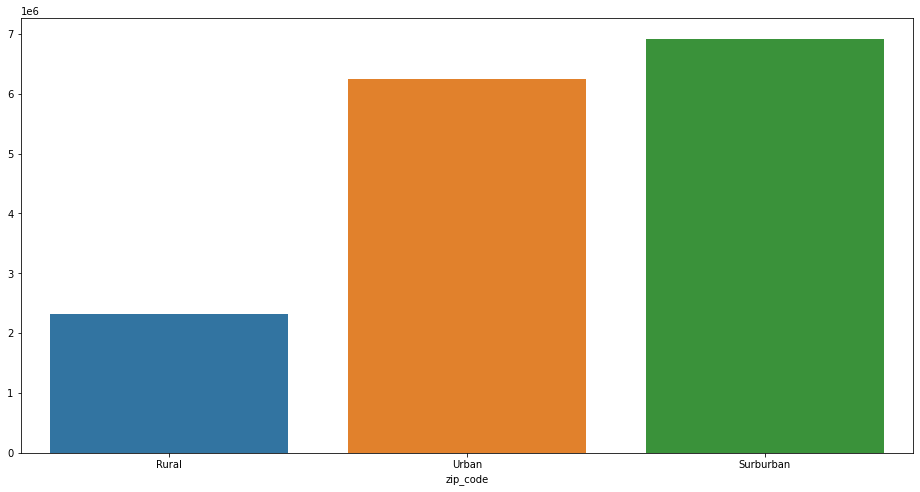

In [ ]:
# Effect of zip_code on history 
fig, ax = plt.subplots(figsize=(16, 8))
data = df.groupby(by = 'zip_code')['history'].sum().sort_values()
ax = sns.barplot(y=data.values, x=data.index);

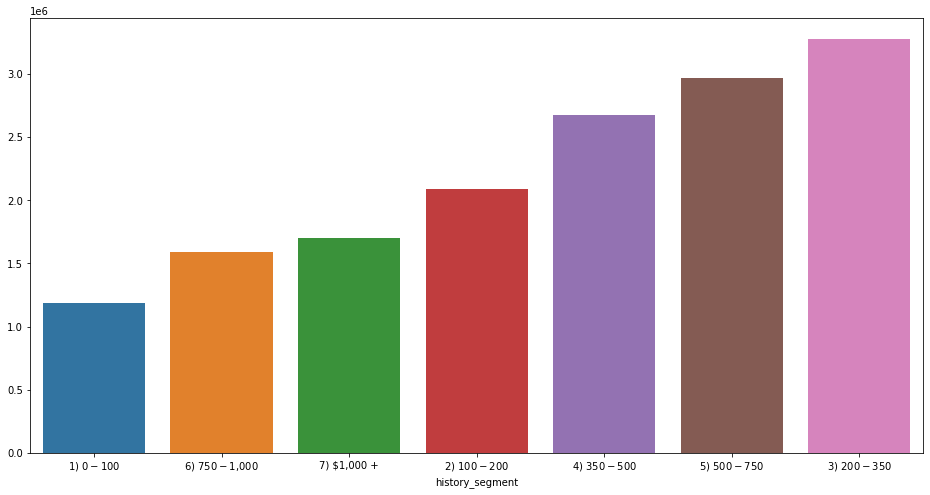

In [ ]:
# Effect of zip_code on history 
fig, ax = plt.subplots(figsize=(16, 8))
data = df.groupby(by = 'history_segment')['history'].sum().sort_values()
ax = sns.barplot(y=data.values, x=data.index);

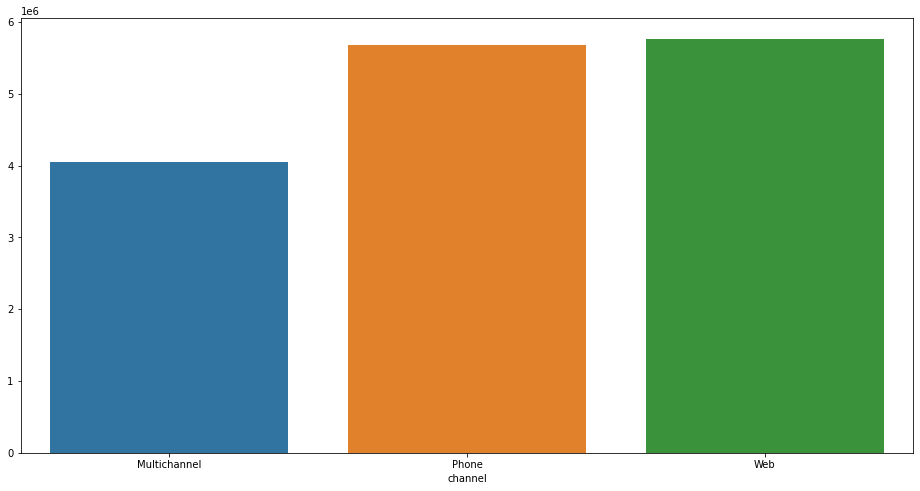

In [ ]:
# Effect of channel on history 
fig, ax = plt.subplots(figsize=(16, 8))
data = df.groupby(by = 'channel')['history'].sum().sort_values()
ax = sns.barplot(y=data.values, x=data.index);

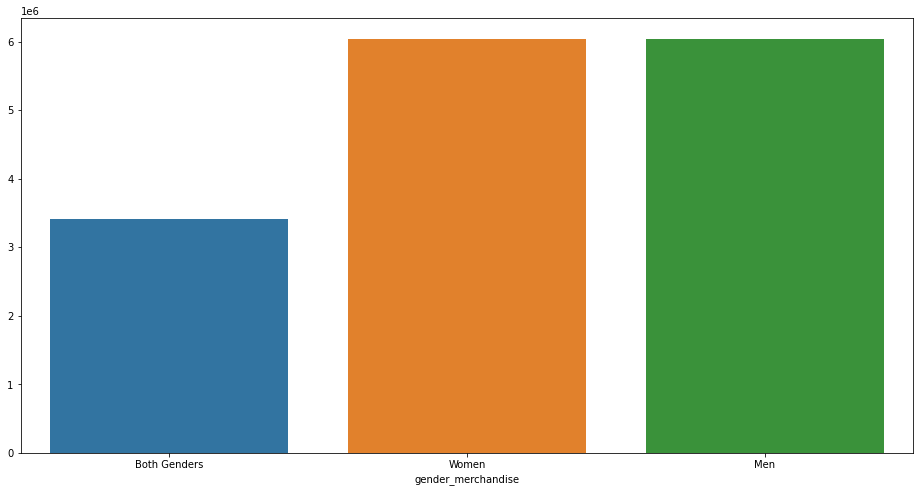

In [ ]:
# Effect of gender merchandise on history 
fig, ax = plt.subplots(figsize=(16, 8))
data = df.groupby(by = 'gender_merchandise')['history'].sum().sort_values()
ax = sns.barplot(y=data.values, x=data.index);

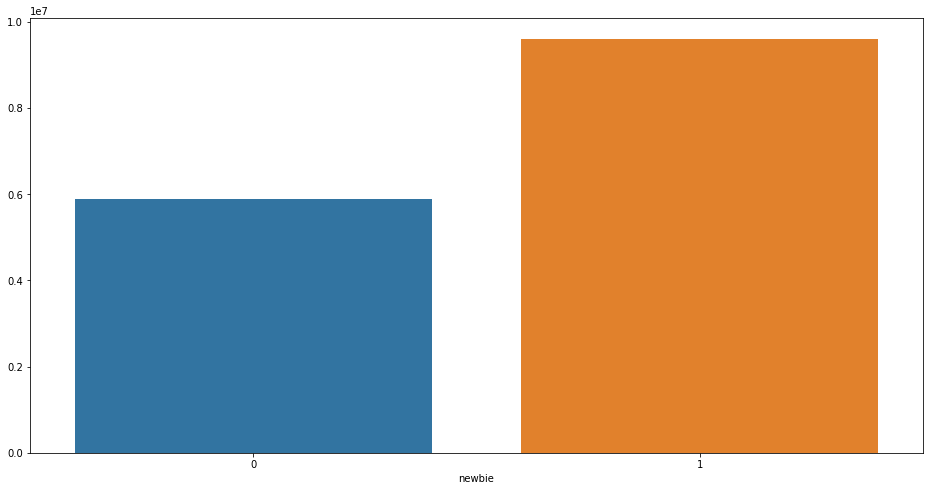

In [ ]:
# Effect of being newbie on history 
fig, ax = plt.subplots(figsize=(16, 8))
data = df.groupby(by = 'newbie')['history'].sum().sort_values()
ax = sns.barplot(y=data.values, x=data.index);

### 4. Predictive Analysis - Machine Learning Model

For predictive model, we would be needing two ML models actually 
- First model (Classification) to predict probability of visits. 
- Second model (Regression) to predict amount of spending for campaign

In [ ]:
# Import libraries for data processing 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# Import classification models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Import regression models 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
# Import Evaluation metrics 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# split the data into training and testing sets 
np.random.seed(42)
X = df_ml.drop(['visit', 'spend'], axis=1)
y1 = df_ml['visit']
y2 = df_ml['spend']
x1_train, x1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, stratify=y1)
x2_train, x2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2)
# create function for fit and score of ML models (classification)
def fit_score_class(models, x_train, x_test, y_train, y_test):
    for name, model in models.items() :
        start = time.time()
        print (f"Fitting {name} model ....")
        model.fit(x_train, y_train)
        end = time.time()
        print (f"{name} Model has took {(end-start):.2f} seconds to finish")
        print (f"Classification Report for {name} Model ")
        y_pred = model.predict(x_test)
        print (classification_report(y_test, y_pred))
        print ('--------------------------------------------')
# Specify classification models and run ml function
class_models = {
    'Logistic_Regression':LogisticRegression(), 
    'KNeighbors':KNeighborsClassifier(),  
    'Random_Forest':RandomForestClassifier()
}
fit_score_class(class_models, x1_train, x1_test, y1_train, y1_test)

Fitting Logistic_Regression model ....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic_Regression Model has took 1.02 seconds to finish
Classification Report for Logistic_Regression Model 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     10921
           1       1.00      0.00      0.00      1879

    accuracy                           0.85     12800
   macro avg       0.93      0.50      0.46     12800
weighted avg       0.87      0.85      0.79     12800

--------------------------------------------
Fitting KNeighbors model ....
KNeighbors Model has took 0.13 seconds to finish
Classification Report for KNeighbors Model 
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     10921
           1       0.19      0.04      0.07      1879

    accuracy                           0.83     12800
   macro avg       0.52      0.50      0.49     12800
weighted avg       0.76      0.83      0.78     12800

--------------------------------------------
Fitting Random_Forest 

#### From above main model of choice would be the Random Forest classifier. Model is chosen for the following : 
- For predicting potential customers, it's totally unacceptable to classify actual customers as not potential customers and hence losing market share. but we could afford marketing to actual non-potential customers as it has probability to reach a potential customer even by peer review. 
- From first point, we find that most valuable parameter for evaluating model is "False Negative Rate" as we need it as minimal as possible and since Recall = TP/TP+FN we are looking for highest "Recall" value for positive prediction. 

#### Now, let's work through hyper-parameter tuning 

In [ ]:
# Tuning hyperparametrs for RandomForest model 
np.random.seed(42)
rs_params = {
    'n_estimators':np.arange(100,600,100),
    'max_depth':np.arange(1,10),
    'max_features':['sqrt','log2'],
    'min_samples_split':np.arange(2,10)
}
model = RandomForestClassifier()
rs_model = RandomizedSearchCV(model, param_distributions=rs_params, cv=5, n_iter=20, verbose=True, scoring='roc_auc')
rs_model.fit(x1_train, y1_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: ignored

In [ ]:
best_model = rs_model.best_estimator_
best_model.fit(x1_train, y1_train)
y_pred = best_model.predict(x1_test)
print (classification_report(y1_test, y_pred))

#### It seems that tuning random forest isn't giving the best needed result so I'll have to go along with normal Random Forest

In [ ]:
model = RandomForestClassifier()
model.fit(x1_train, y1_train)
y_pred = model.predict(x1_test)
print (classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     10921
           1       0.19      0.12      0.15      1879

    accuracy                           0.80     12800
   macro avg       0.52      0.52      0.51     12800
weighted avg       0.76      0.80      0.78     12800



In [ ]:
best_class_pickled = pickle.dump(model, open('class_model.pkl', 'wb'))

#### Now we will start working on regression model to predict spending 

In [ ]:
# create function for fit and score of ML models (Regression)
def fit_score_reg(models, x_train, x_test, y_train, y_test):
    for name, model in models.items() :
        start = time.time()
        print (f"Fitting {name} model ....")
        model.fit(x_train, y_train)
        end = time.time()
        print (f"{name} Model has took {(end-start):.2f} seconds to finish")
        y_pred = model.predict(x_test)
        print (f"MAE for {name} model is {mean_absolute_error(y_test, y_pred):.2f}")
        print (f"MSE for {name} model is {mean_squared_error(y_test, y_pred):.2f}")
        print (f"RMSE for {name} model is {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
        print ('--------------------------------------------')
# Specify regression models and run ml function
reg_models = {
    'Linear_Regression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'Random_Forest':RandomForestRegressor()
}
fit_score_reg(reg_models, x2_train, x2_test, y2_train, y2_test)

Fitting Linear_Regression model ....
Linear_Regression Model has took 0.04 seconds to finish
MAE for Linear_Regression model is 1.97
MSE for Linear_Regression model is 174.69
RMSE for Linear_Regression model is 13.22
--------------------------------------------
Fitting Ridge model ....
Ridge Model has took 0.01 seconds to finish
MAE for Ridge model is 1.97
MSE for Ridge model is 174.69
RMSE for Ridge model is 13.22
--------------------------------------------
Fitting Lasso model ....
Lasso Model has took 0.01 seconds to finish
MAE for Lasso model is 1.97
MSE for Lasso model is 174.67
RMSE for Lasso model is 13.22
--------------------------------------------
Fitting Random_Forest model ....
Random_Forest Model has took 8.61 seconds to finish
MAE for Random_Forest model is 2.13
MSE for Random_Forest model is 211.67
RMSE for Random_Forest model is 14.55
--------------------------------------------


In [ ]:
model = LinearRegression()
model.fit(x2_train, y2_train)
reg_model_pickled = pickle.dump(model, open('reg_model.pkl', 'wb'))

#### 5. Final Report & Findings 
##### Regarding final findings, we will try to answer main questions with visualizations and present findings from data

In [ ]:
df.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0


##### 5.1 Which Email Campaign Performs the Best ? 

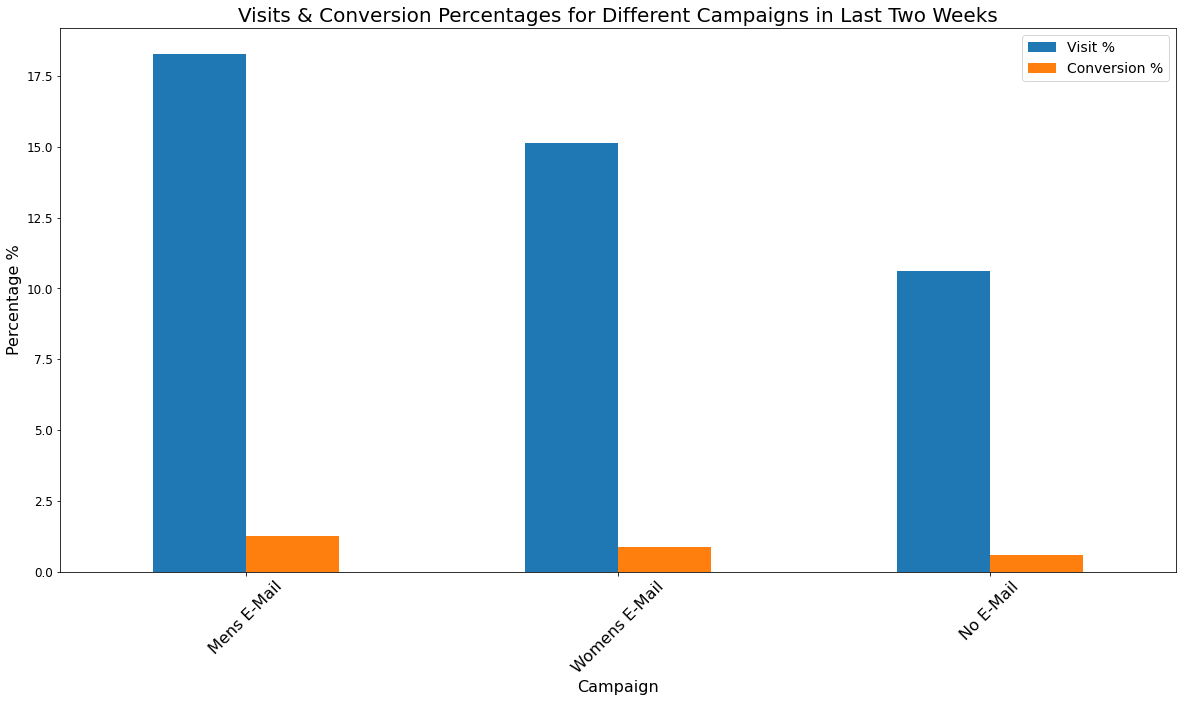

In [ ]:
data = df.groupby(by='segment').agg({'visit':np.mean, 'conversion':np.mean})
data['visit'] = round(100 * data['visit'],2)
data['conversion'] = round(100 * data['conversion'],2)
data = data.reset_index().sort_values(by='visit', ascending=False)
data.plot(kind='bar', x='segment', figsize=(20, 10))
plt.title('Visits & Conversion Percentages for Different Campaigns in Last Two Weeks', fontsize=20)
plt.legend(['Visit %', 'Conversion %'], fontsize=14)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=12)
plt.xlabel('Campaign', fontsize=16)
plt.ylabel('Percentage %', fontsize=16);

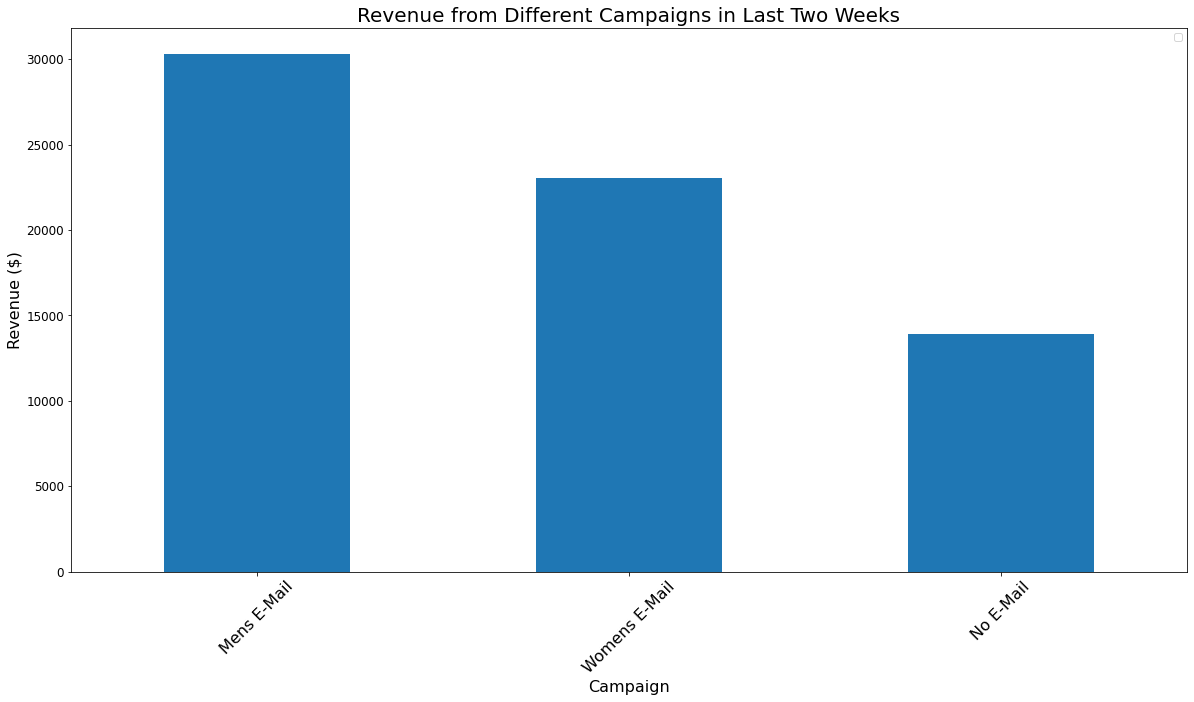

In [ ]:
data = df.groupby(by='segment').agg({'spend':np.sum})
data = data.reset_index().sort_values(by='spend', ascending=False)
data.plot(kind='bar', x='segment', figsize=(20, 10))
plt.title('Revenue from Different Campaigns in Last Two Weeks', fontsize=20)
plt.legend("")
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=12)
plt.xlabel('Campaign', fontsize=16)
plt.ylabel('Revenue ($)', fontsize=16);

##### 5.2 From ML Model and Exploratory Analysis, who would and who wouldn't be main target in future ? 

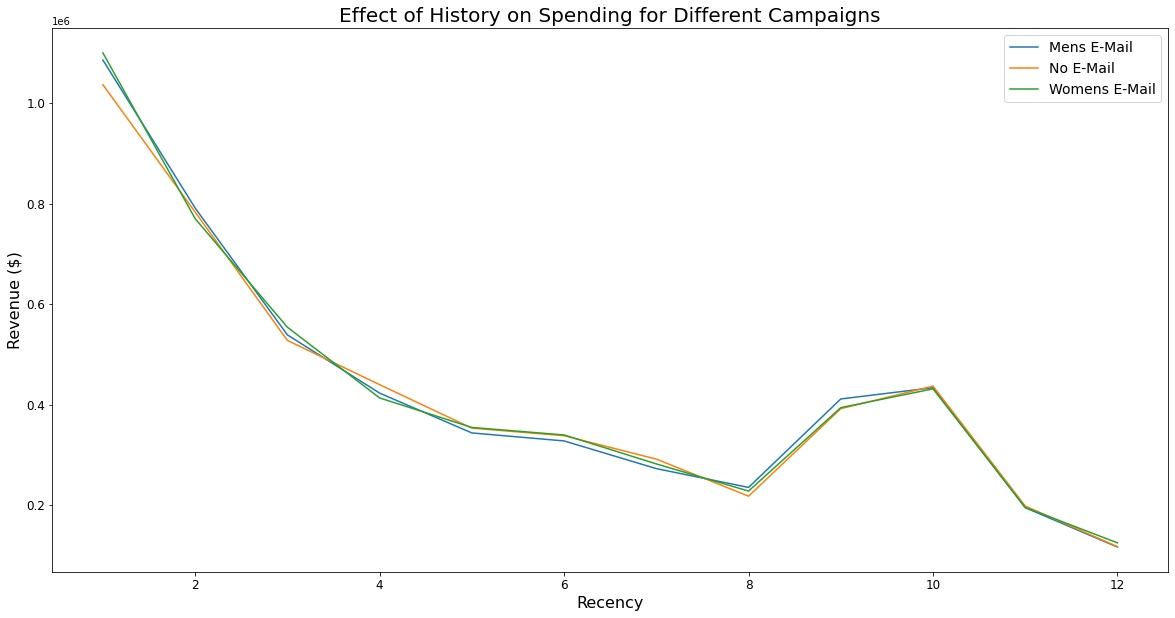

In [ ]:
# Effect of Recency on Actual Spending
data = df.groupby(['segment', 'recency'])['history'].sum().reset_index()
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.lineplot(data=data, x='recency', y='history', hue='segment')
plt.title("Effect of History on Spending for Different Campaigns", fontsize=20)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Recency', fontsize=16)
plt.ylabel('Revenue ($)', fontsize=16);

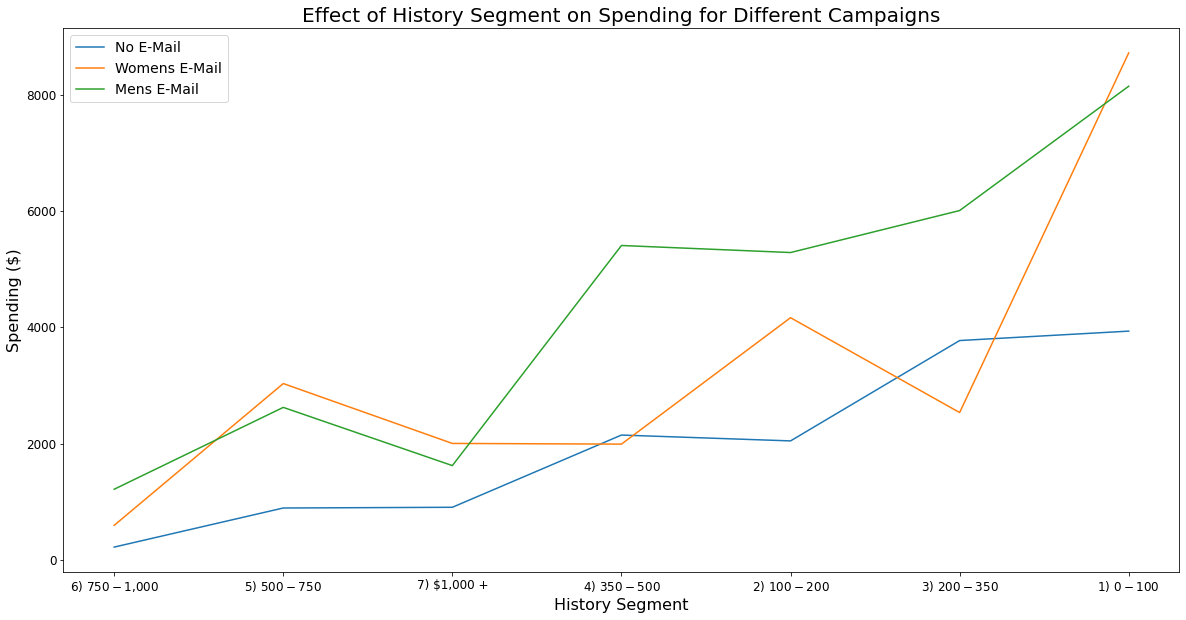

In [ ]:
# Effect of History Segment on Actual Spending
data = df.groupby(['segment', 'history_segment'])['spend'].sum().reset_index().sort_values(by='spend')
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.lineplot(data=data, x='history_segment', y='spend', hue='segment')
plt.title("Effect of History Segment on Spending for Different Campaigns", fontsize=20)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('History Segment', fontsize=16)
plt.ylabel('Spending ($)', fontsize=16);

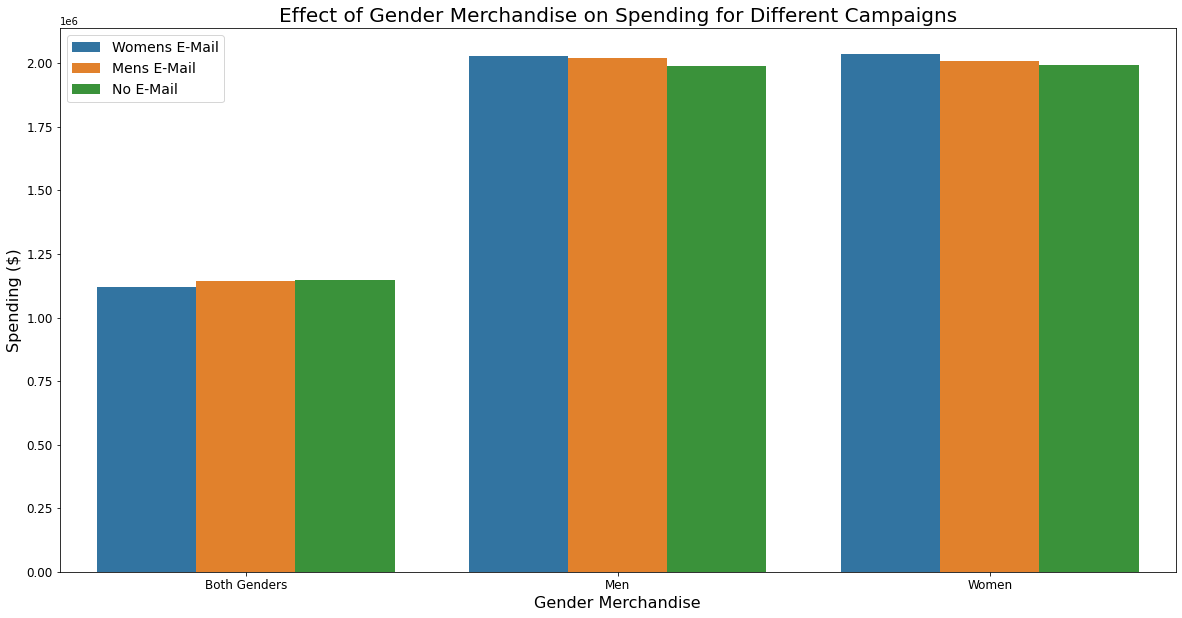

In [ ]:
# Effect of Gender Merchandise on Actual Spending
data = df.groupby(['segment', 'gender_merchandise'])['history'].sum().reset_index().sort_values(by='history')
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(data=data, x='gender_merchandise', y='history', hue='segment')
plt.title("Effect of Gender Merchandise on History for Different Campaigns", fontsize=20)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Gender Merchandise', fontsize=16)
plt.ylabel('Revenue($)', fontsize=16);

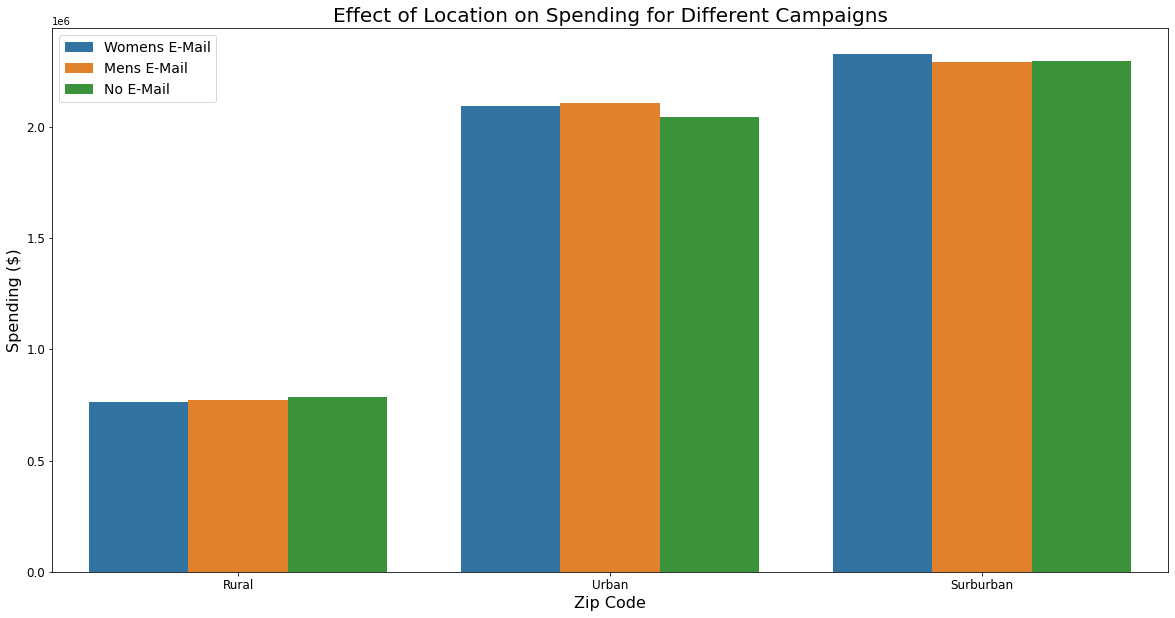

In [ ]:
# Effect of zip_code on Actual Spending
data = df.groupby(['segment', 'zip_code'])['history'].sum().reset_index().sort_values(by='history')
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(data=data, x='zip_code', y='history', hue='segment')
plt.title("Effect of Location on History for Different Campaigns", fontsize=20)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Zip Code', fontsize=16)
plt.ylabel('Revenue($)', fontsize=16);

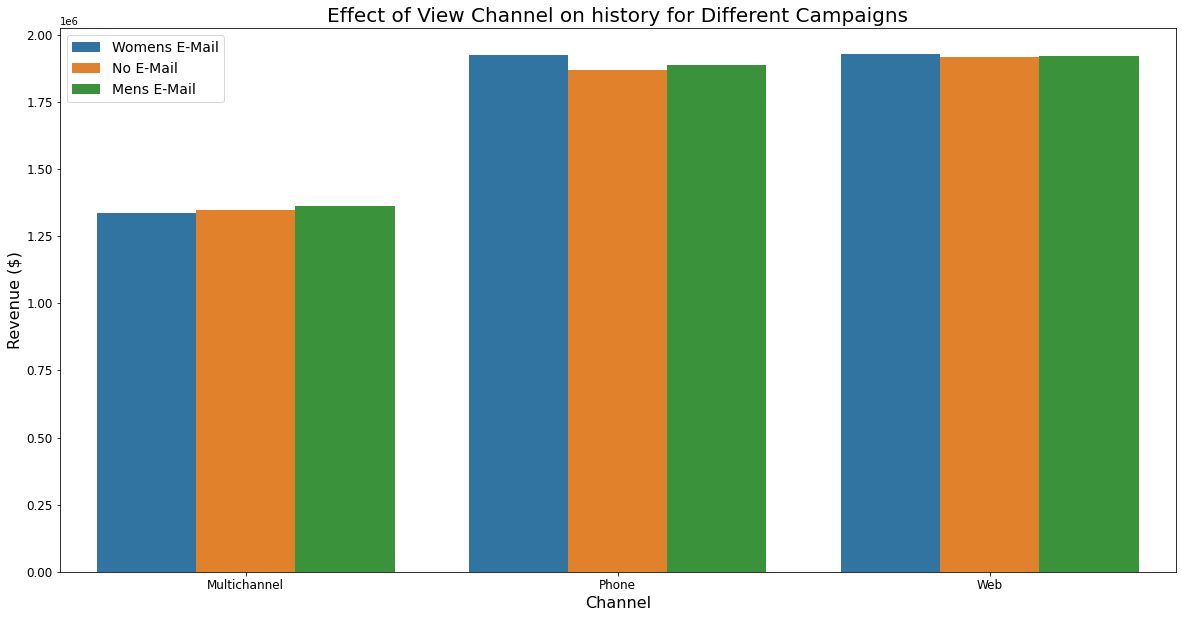

In [ ]:
# Effect of Channel on Actual Spending
data = df.groupby(['segment', 'channel'])['history'].sum().reset_index().sort_values(by='history')
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(data=data, x='channel', y='history', hue='segment')
plt.title("Effect of View Channel on history for Different Campaigns", fontsize=20)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Channel', fontsize=16)
plt.ylabel('Revenue ($)', fontsize=16);

##### 5.3 How many targets would we go after in future ? 

##### We would need to go after customers that who didn't respond to our campaign either by buying or even visiting our product

In [ ]:
non_visit_conv = df[(df['visit']==0) & (df['conversion']==0)]
print (f"Around {len(non_visit_conv)} person haven't responded to our campign making percentage of {100 * len(non_visit_conv)/len(df):.1f} % of total customers")

Around 54606 person haven't responded to our campign making percentage of 85.3 % of total customers


##### 5.4 Main Findings in Data from Exploratory Analysis
* For Three Segments (Men Campaign, Women Campaign, No Campaign), it appears that Men Campaign was the most successful as Men campaign achieved more than 1.3 revenue than women campaign and more than 2 times that of no campaign at all. Results are nearly the same for visits percentage. 
* Customers with low recency are more likely to respond to campaigns and make purchase. Actually from 40-50 % of campaign revenue was from customers with less than 4 months recency.
* Customers from low purchase history segments (<350$) are much more likely to respond. Actually these segments are the vast majority of our customers making more than 60% of campaign revenue making them very potential customer. 
* Our main customers are in Suburban & urban regions making revenue more than 2-3 times that of rural regions. 
* Web & Phone channels users are more likely to respond than multichannel users. They were 3 times more responsive to campaign than multichannel users. In General These 2 channel achieve 1.5 more revenue than multichannel. 

##### 5.5 Key Insights and Recommendations 
* For Evaluation Purposes, Men Campaign was the best. Also, for evaluation both campaigns were not very successful as 85.3% of all previous customers didn't respond at all. More work on next campaign is needed. 
* Customers with low recency are more likely to discover new platforms but actually people with history segment from 200-750 $ are very stable segments to rely on. Next Campaign need to attract new customers as they would be very stable source of revenue if they got attached. 
* With rise of technology, more focus is needed on web, phone platforms as they present most of revenue and are much more usable. 
* Rural regions due to lifestyle may not very interested in our product. Lifestyle of customer (Urban, Suburban) is very important in determining and maintaining potential customers. 